# **Load Basic Libraries**

In [2]:
import numpy as np #used to make numpy arrays
import pandas as pd #used to make data frame(structured table)
import matplotlib.pyplot as plt #plots and graph
import seaborn as sns #plots and graphs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics #evaluation purposes

# **Reading the csv file**

In [3]:
import pandas as pd

df = pd.read_csv('D:/Py/heart_disease_prediction/heart1.csv')

In [4]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


##**Exploring the data set in order to derive useful information**

In [5]:
df.shape

(1025, 14)

<i>this shows our data has 1025 rows and 14 columns</i>

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<i>we can see the column names here</i>

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<i>Statstical Details Describe provides us with statistical information in the numerical format. we can infer that in the AGE column the minimum age is 29yrs and maximium is 77yrs mean of age is 54yrs. The quartiles details are given in form of 25%, 50% and 75%. The data is divided into 3 quartiles or 4 equal parts. so 25% values lie in each group. standard deviation and mean are statistical measures which give us an idea of the central tendency of the data set. However , mean is effected by outliers and hence we need more information to make accurate decisions.</i>

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


<i>we notice that the dataset has no null values. this saved us from conveting the null values into some data or dropping then altogether.</i>

# **Finding the correlation among the attributes**

<Axes: >

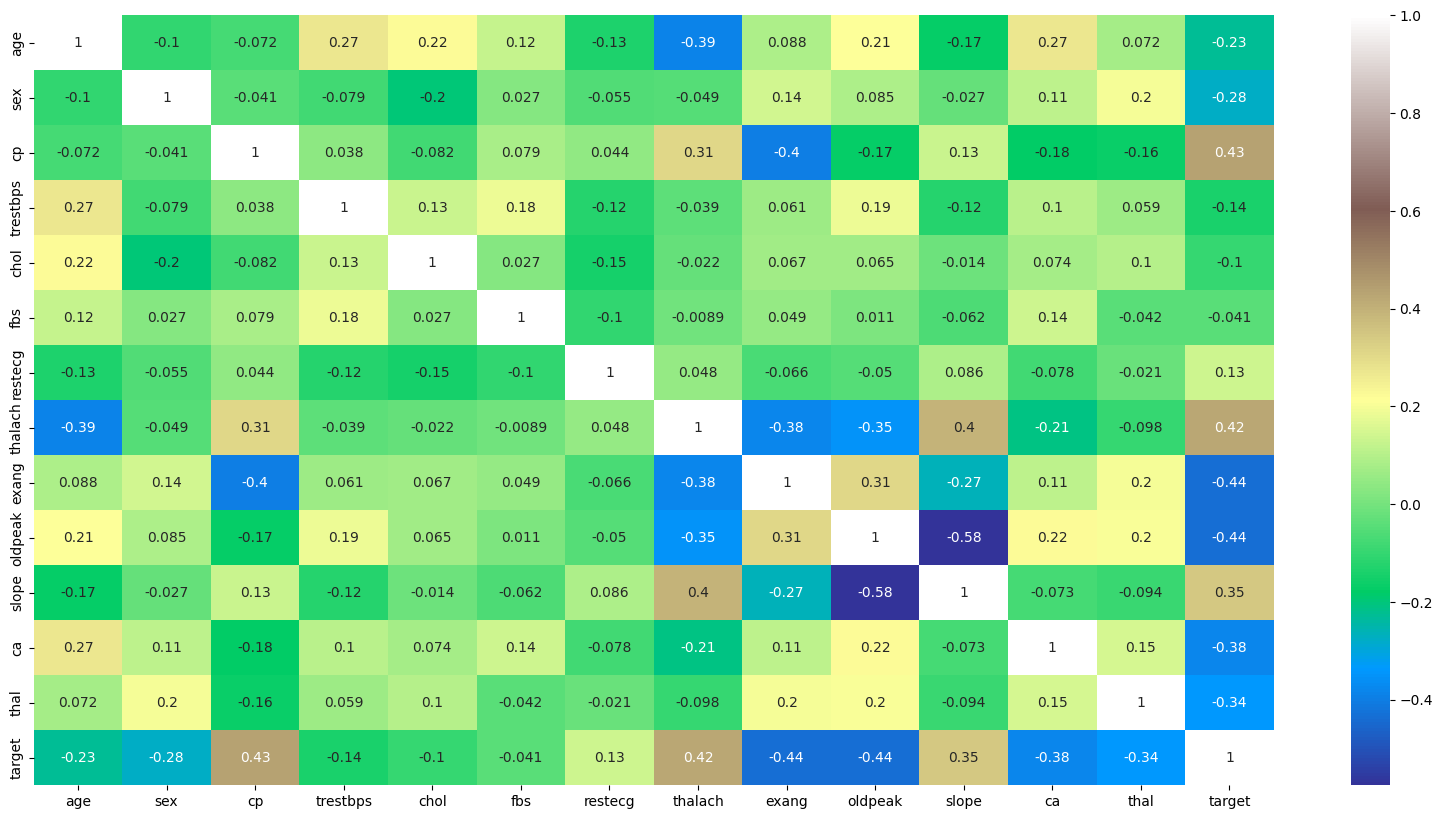

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='terrain')

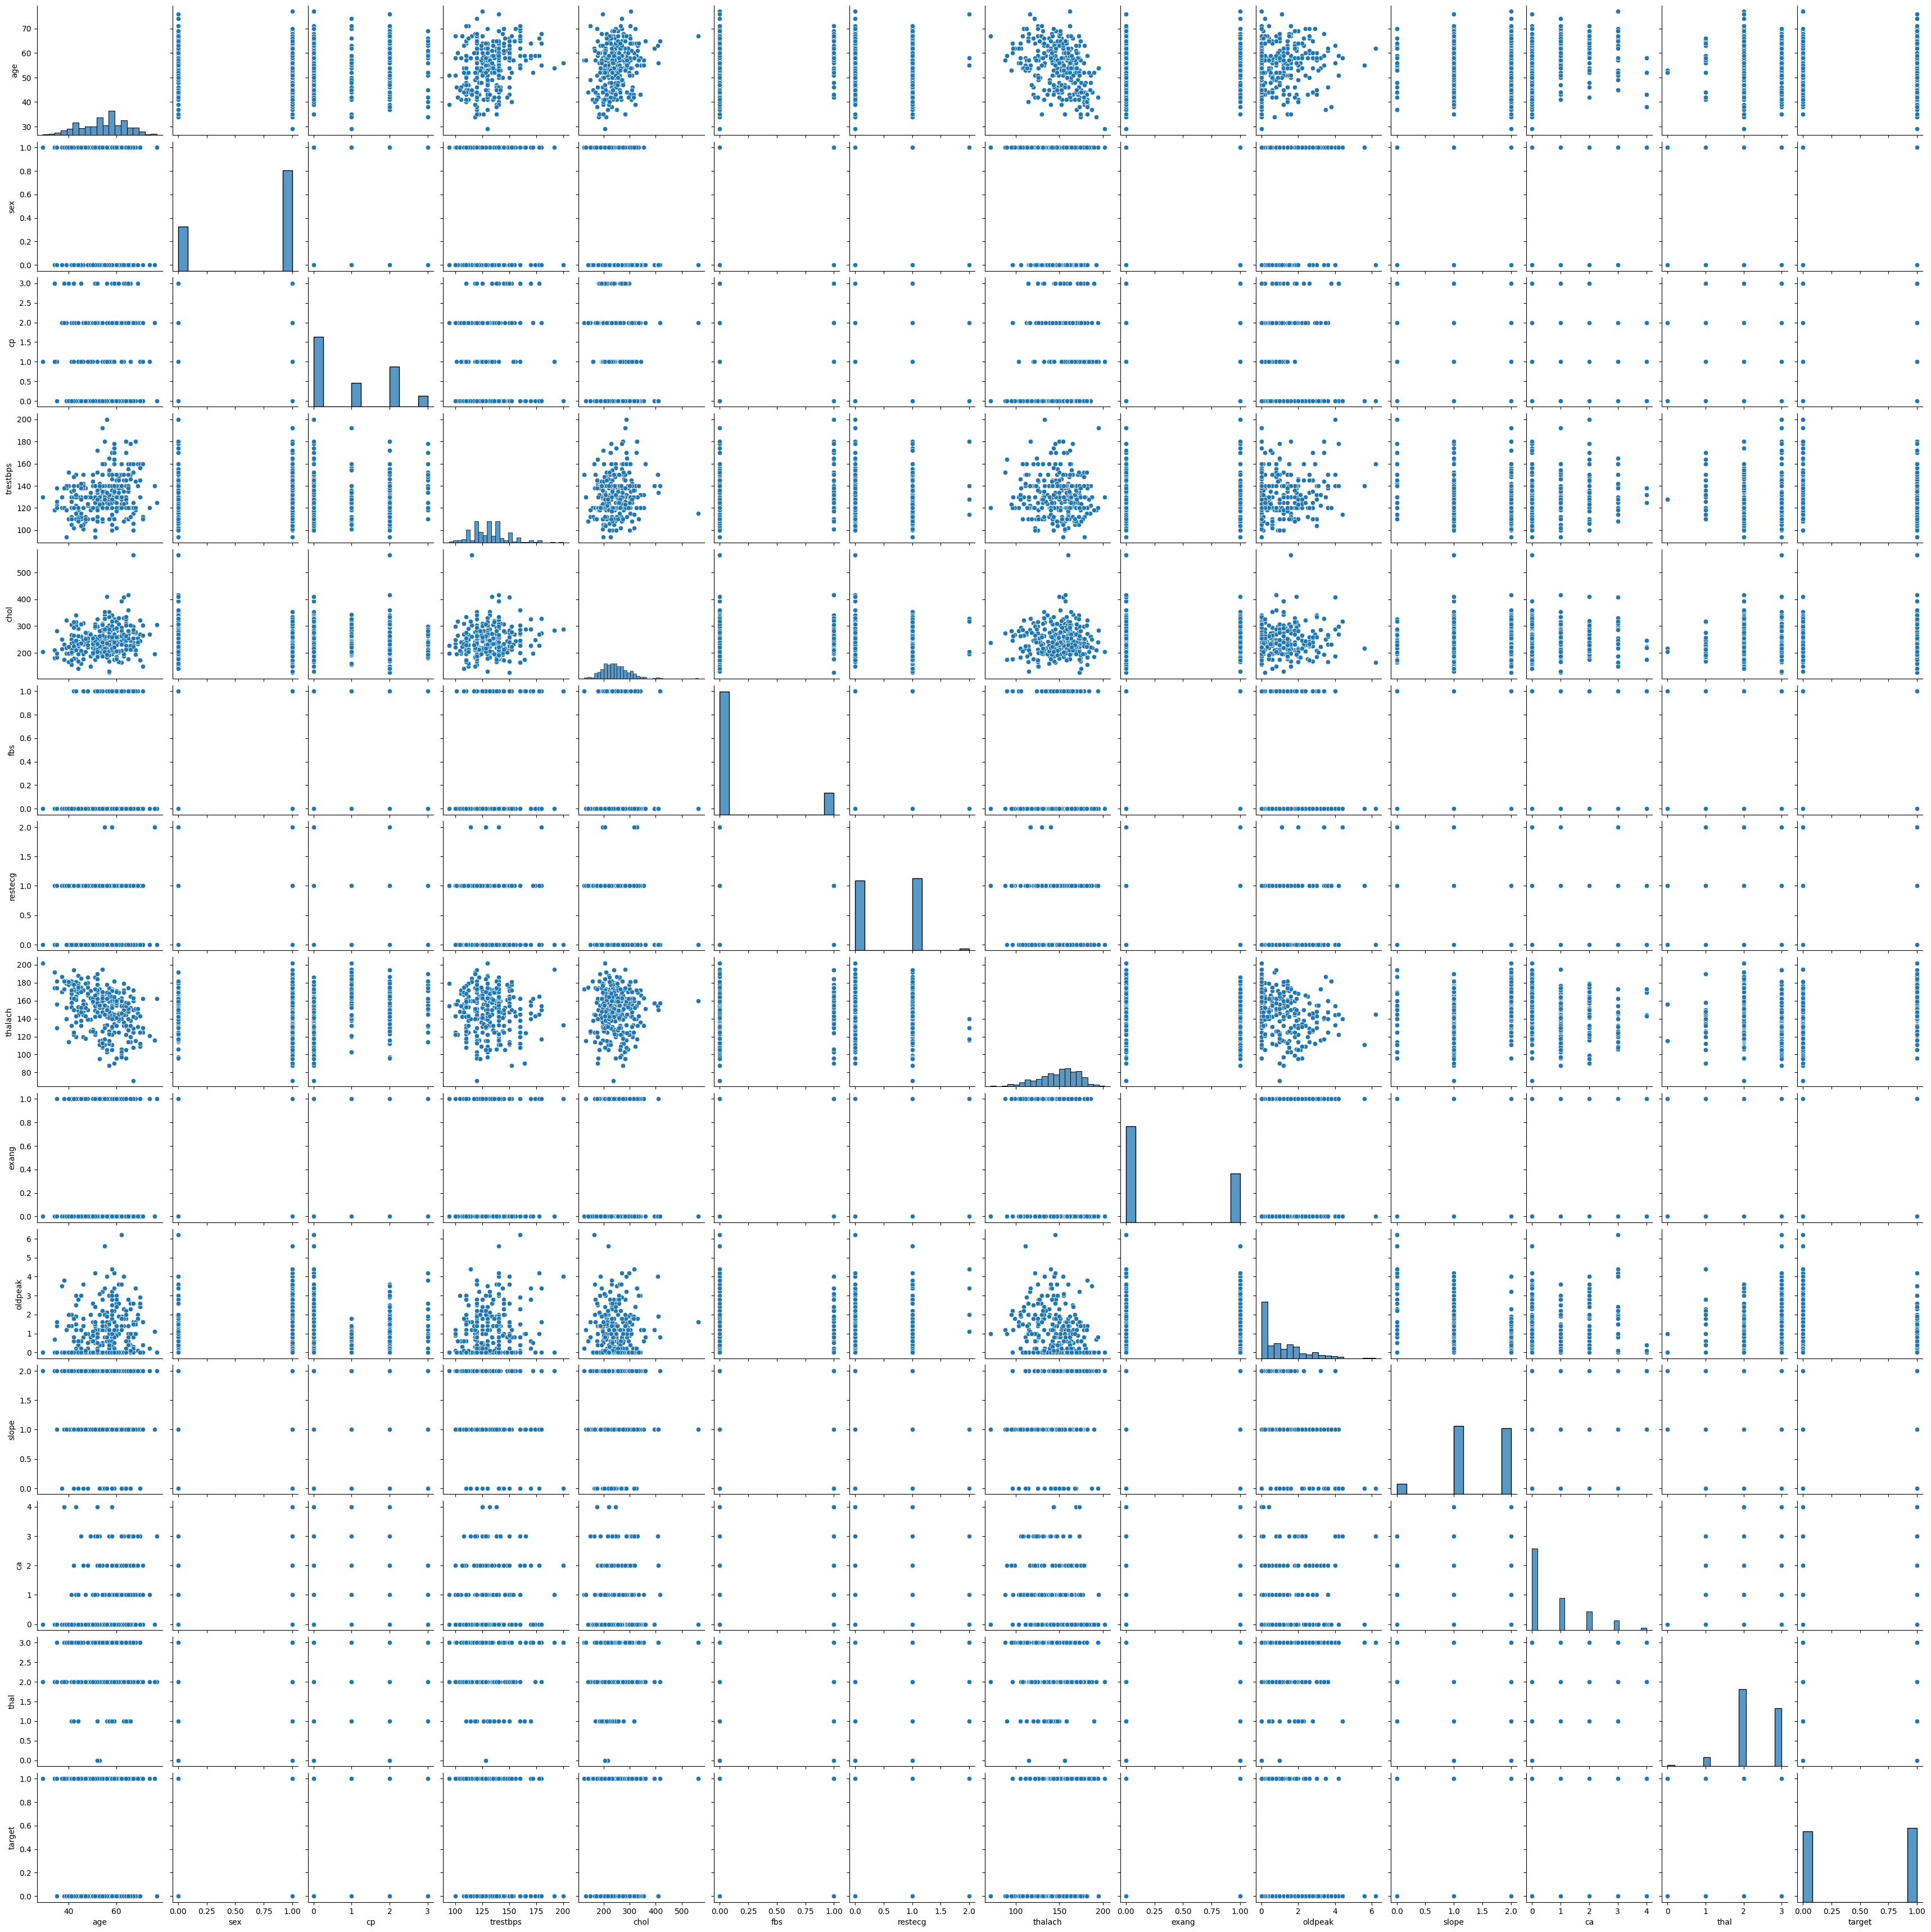

In [11]:
sns.pairplot(data=df)

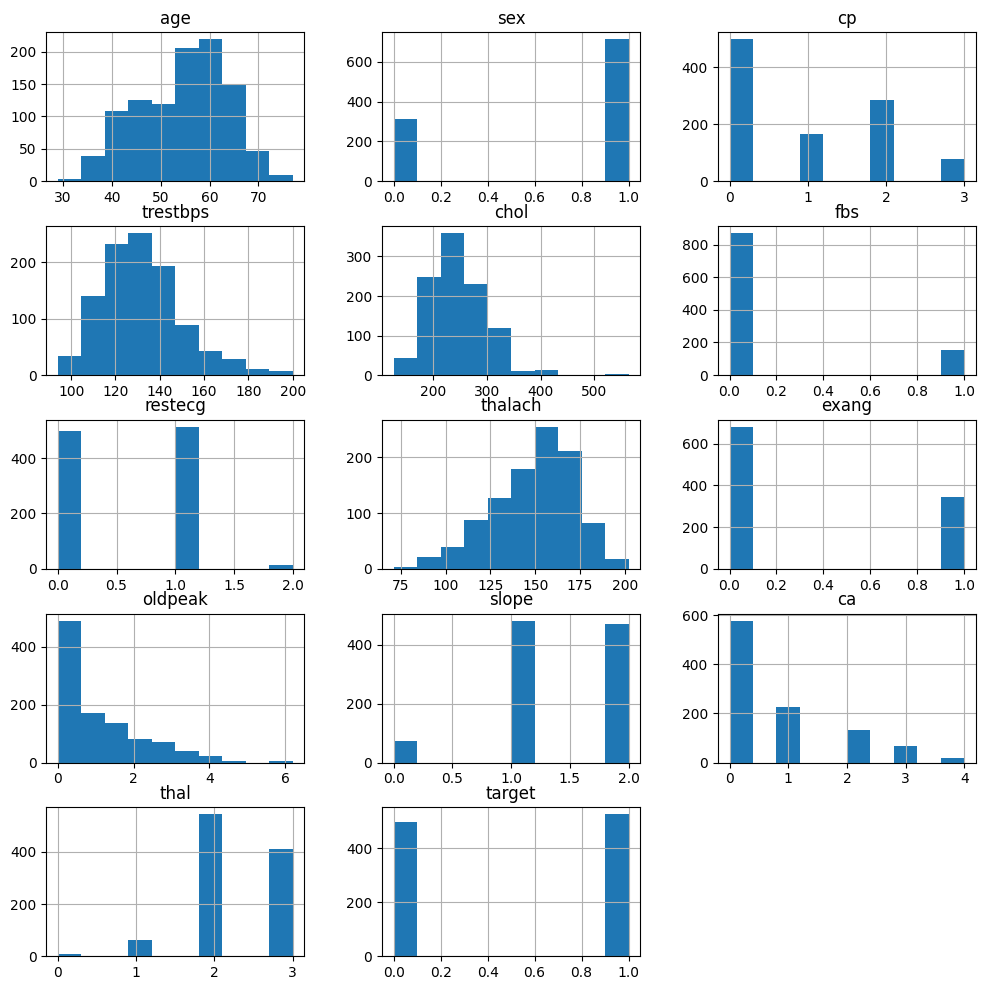

In [12]:
df.hist(figsize=(12,12), layout=(5,3));

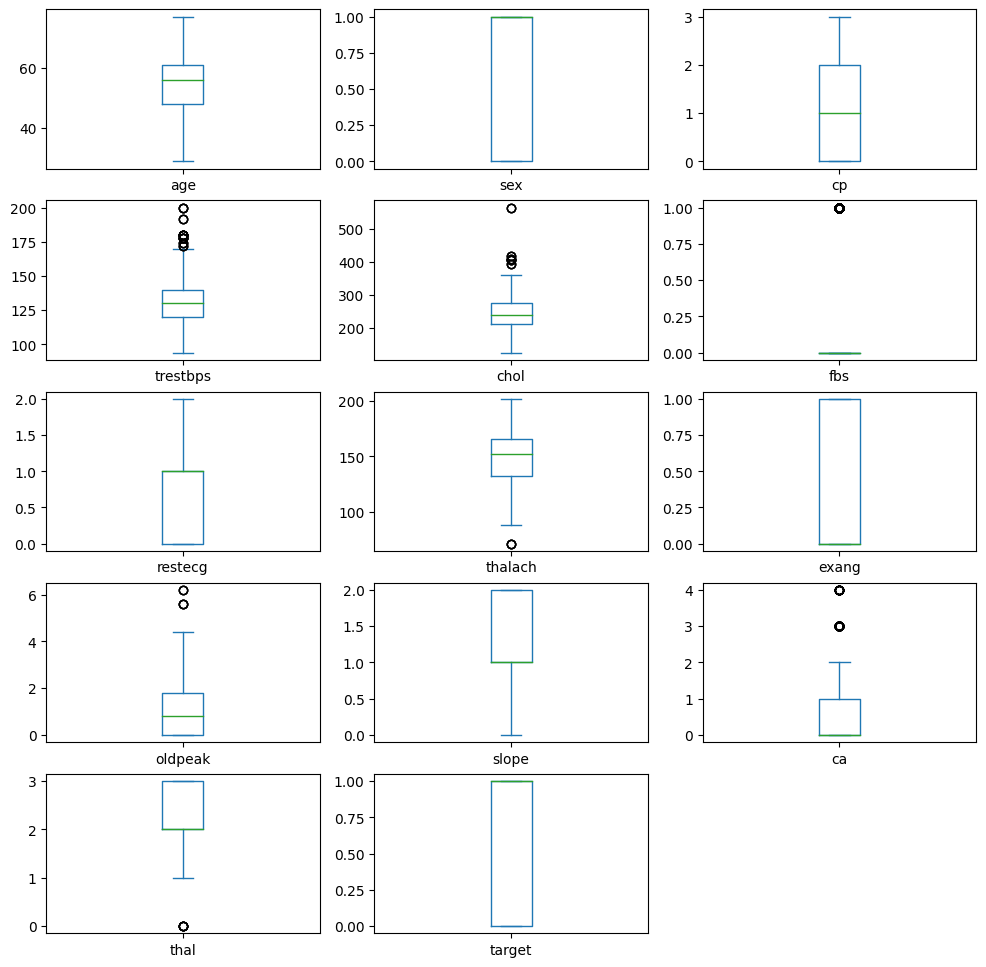

In [13]:
# box and whiskers plot
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

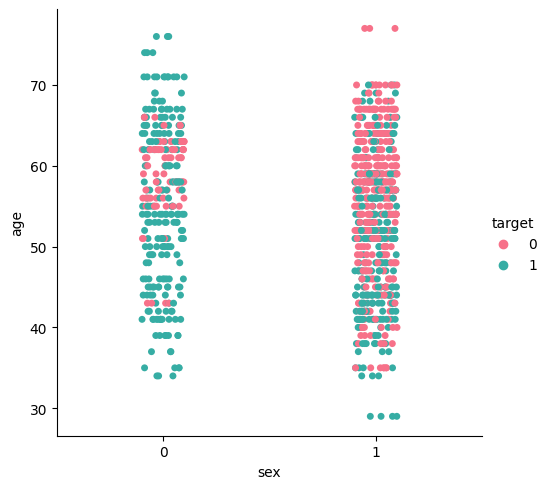

In [14]:
sns.catplot(data=df, x='sex', y='age',  hue='target', palette='husl')

<Axes: xlabel='sex', ylabel='chol'>

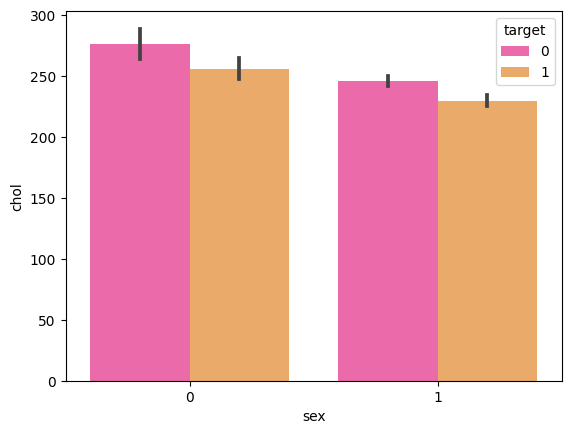

In [15]:
sns.barplot(data=df, x='sex', y='chol', hue='target', palette='spring')

In [16]:
df['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

### **713 males and 312 females**

In [17]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

### **526 cases of heart diseases and 499 cases of no heart diseases**

In [18]:
df['thal'].value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

<b>results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect</b>

<Axes: xlabel='sex', ylabel='count'>

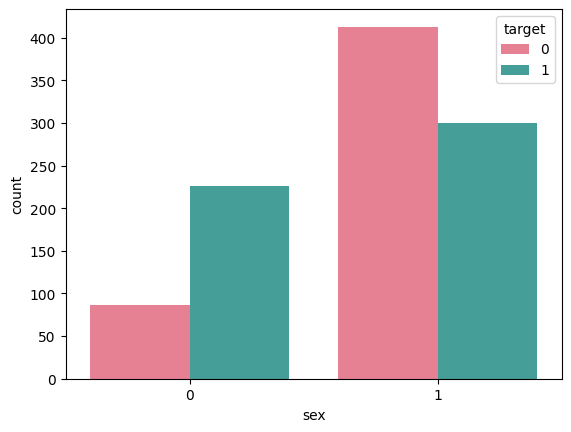

In [19]:
sns.countplot(x='sex', data=df, palette='husl', hue='target')

Here 1 means male and 0 denotes female. we observe females not  having heart disease are comparatively less when compared to males Males have low heart diseases as compared to females in the given dataset.

<Axes: xlabel='target', ylabel='count'>

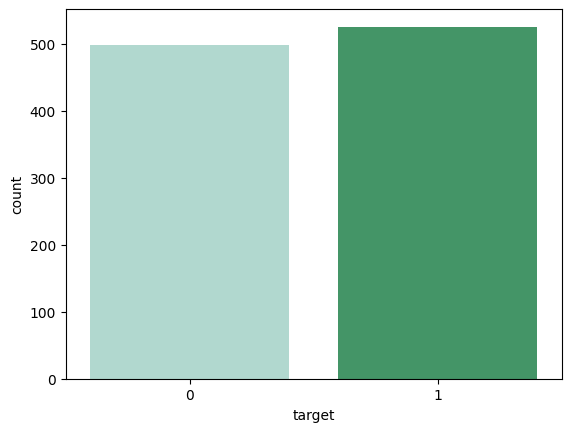

In [20]:
sns.countplot(x='target',palette='BuGn', data=df)

we observe the count for not having heart disease and having heart disease are almost balanced not having frequency count is 499 and those having heart disease the count is 526

<Axes: xlabel='ca', ylabel='count'>

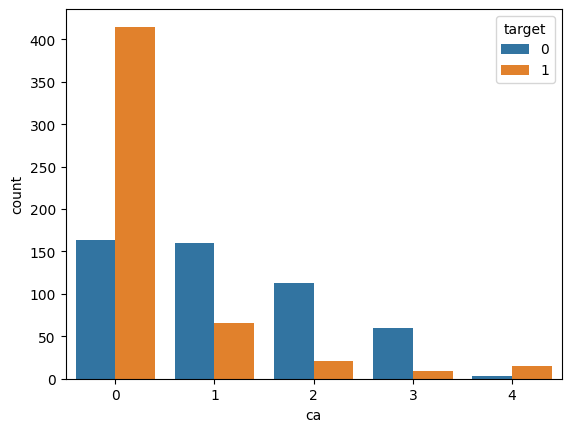

In [21]:
sns.countplot(x='ca',hue='target',data=df)

<b>ca : number of major vessels (0-3) colored by flourosopy</b>

In [22]:
df['ca'].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

ca number of major vessels (0-3) colored by flourosopy ca has a negative corelation with the target i.e when ca will increase we witness a drop in heart diseases and vice versa.

<Axes: xlabel='thal', ylabel='count'>

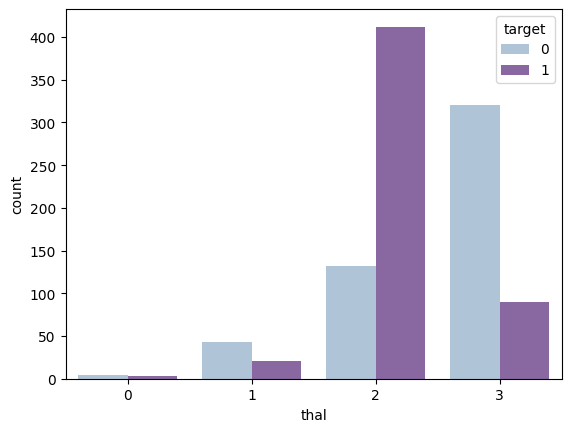

In [23]:
sns.countplot(x='thal',data=df, hue='target', palette='BuPu' )

thal3 = normal; 6 = fixed defect; 7 = reversable defect

<Axes: xlabel='thal', ylabel='count'>

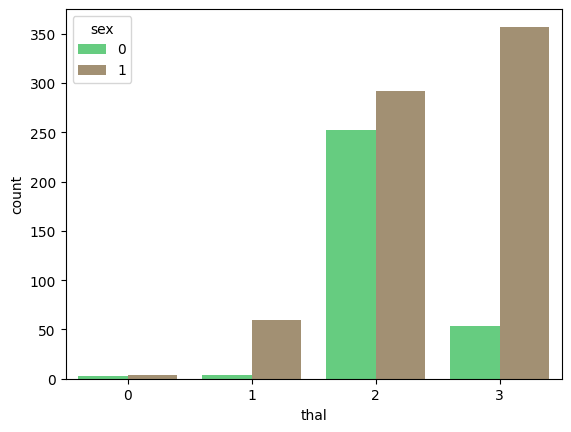

In [24]:
sns.countplot(x='thal', hue='sex',data=df, palette='terrain')

In [25]:
df['cp'].value_counts()  # chest pain type

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

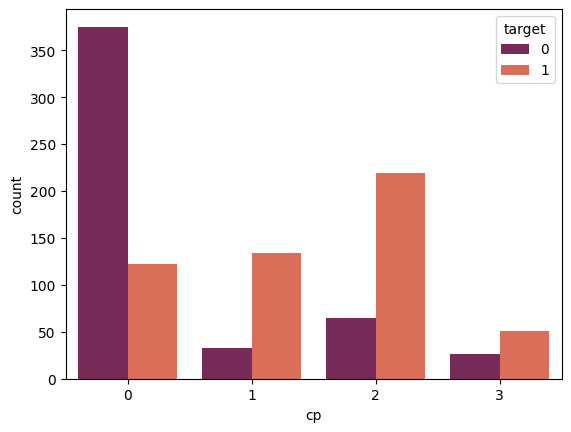

In [26]:
sns.countplot(x='cp' ,hue='target', data=df, palette='rocket')

shows chest pain with respect to heart disease/ target

<Axes: xlabel='cp', ylabel='count'>

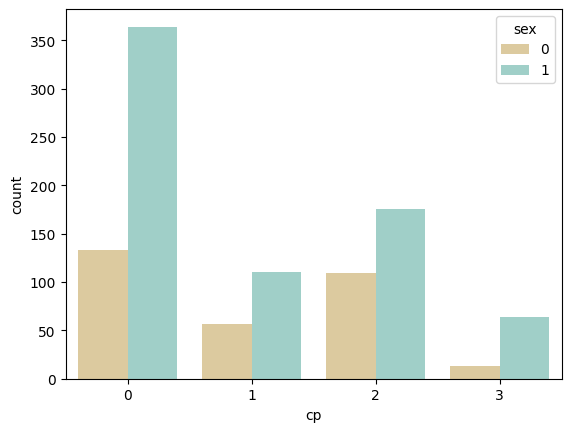

In [27]:
sns.countplot(x='cp', hue='sex',data=df, palette='BrBG')

this shows chest pain count experienced by male and female

<Axes: xlabel='sex', ylabel='chol'>

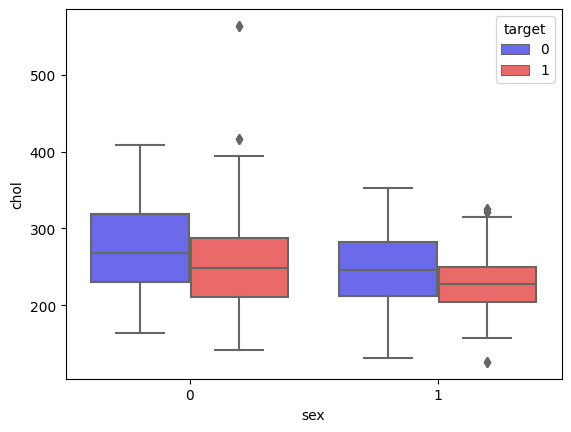

In [28]:
sns.boxplot(x='sex', y='chol', hue='target', palette='seismic', data=df)

we observe the outliers with the help of boxplot. outliers are values that are very small or large in the given data set.

<Axes: xlabel='sex', ylabel='cp'>

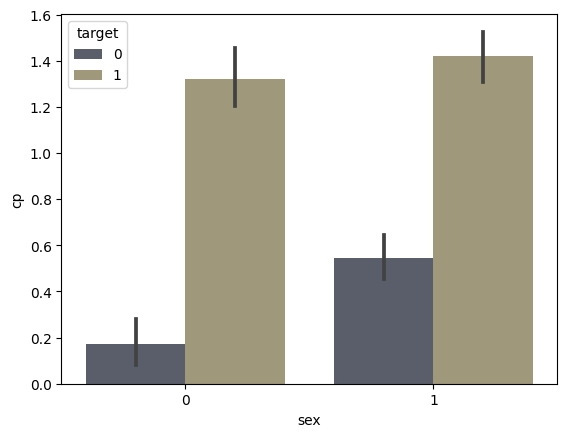

In [29]:
sns.barplot(x='sex', y='cp', hue='target',data=df, palette='cividis')

<Axes: xlabel='sex', ylabel='thal'>

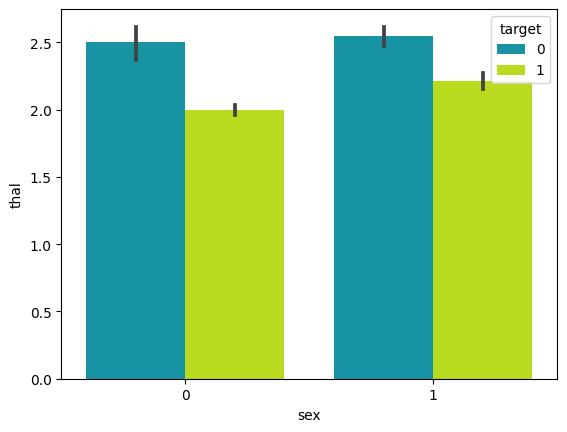

In [30]:
sns.barplot(x='sex', y='thal', data=df, hue='target', palette='nipy_spectral')

<Axes: xlabel='target', ylabel='ca'>

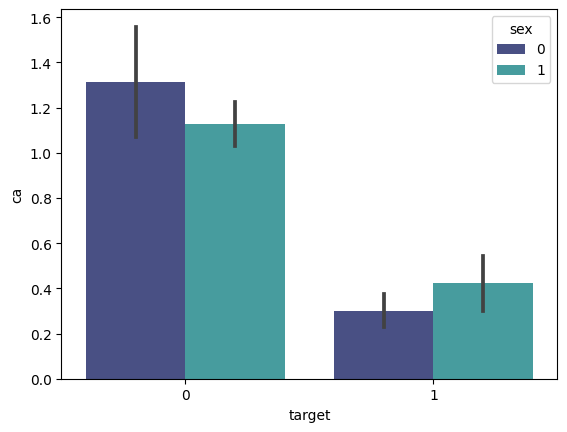

In [31]:
sns.barplot(x='target', y='ca', hue='sex', data=df, palette='mako')

<Axes: xlabel='sex', ylabel='oldpeak'>

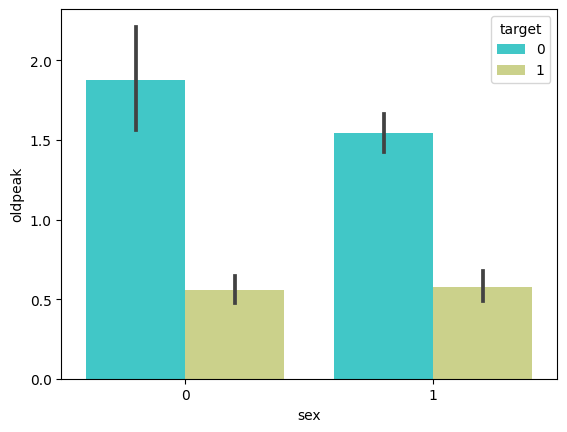

In [32]:
sns.barplot(x='sex', y='oldpeak', hue='target', palette='rainbow', data=df)

<b>ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms</b>

### **fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) and chest pain relation**

In [33]:
df['fbs'].value_counts()

0    872
1    153
Name: fbs, dtype: int64

<Axes: xlabel='fbs', ylabel='chol'>

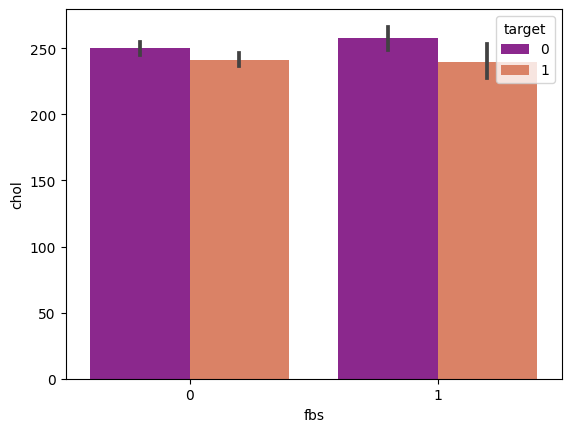

In [34]:
sns.barplot(x='fbs', y='chol', hue='target', data=df,palette='plasma' )

<Axes: xlabel='sex', ylabel='target'>

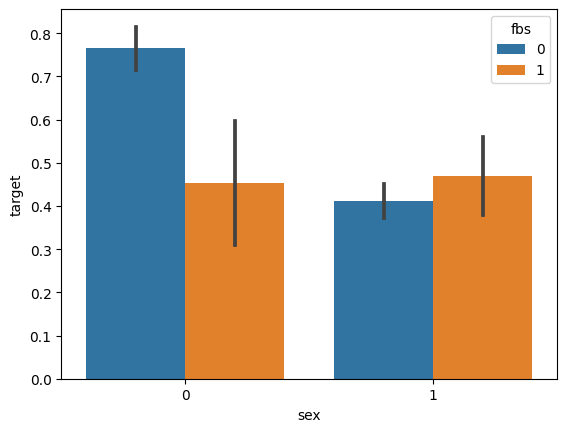

In [35]:
sns.barplot(x='sex',y='target', hue='fbs',data=df)

## **Cross Tables**


In [36]:
gen = pd.crosstab(df['sex'], df['target'])
print(gen)

target    0    1
sex             
0        86  226
1       413  300


<Axes: xlabel='sex'>

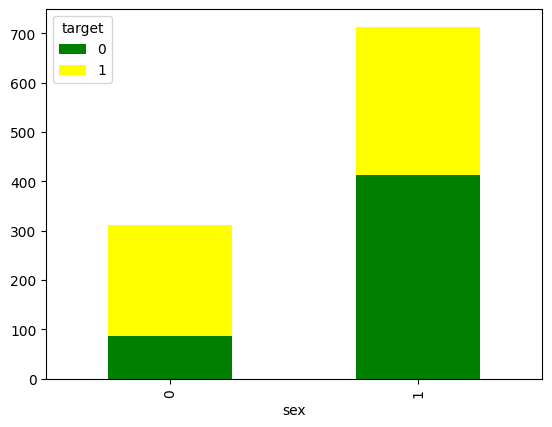

In [37]:
gen.plot(kind='bar', stacked=True, color=['green','yellow'], grid=False)

In [38]:
temp=pd.crosstab(index=df['sex'],
            columns=[df['thal']], 
            margins=True)
temp

thal,0,1,2,3,All
sex,,,,,
0,3,4,252,53,312
1,4,60,292,357,713
All,7,64,544,410,1025


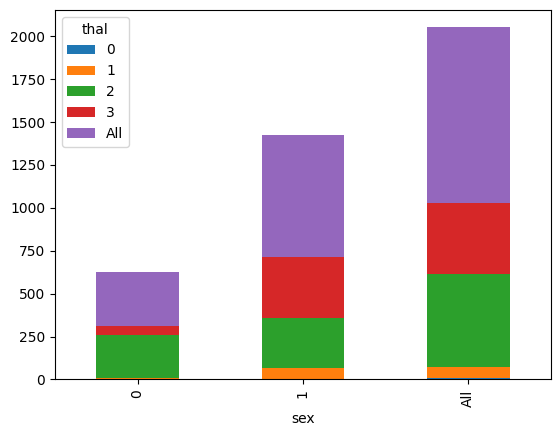

In [39]:
temp.plot(kind="bar",stacked=True)
plt.show()

In [40]:
temp=pd.crosstab(index=df['target'],
            columns=[df['thal']], 
            margins=True)
temp

thal,0,1,2,3,All
target,,,,,
0,4,43,132,320,499
1,3,21,412,90,526
All,7,64,544,410,1025


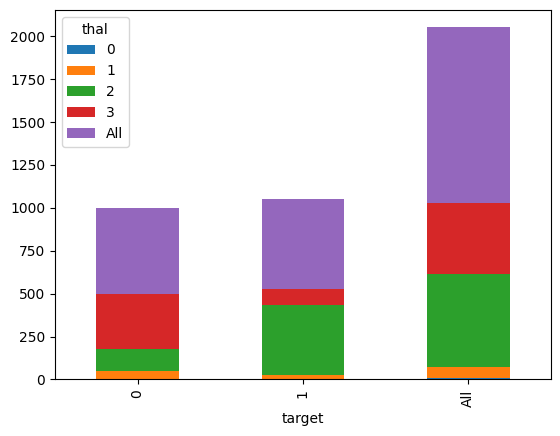

In [41]:
temp.plot(kind='bar', stacked=True)
plt.show()

In [42]:
chest_pain = pd.crosstab(df['cp'], df['target'])
chest_pain

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


<Axes: xlabel='cp'>

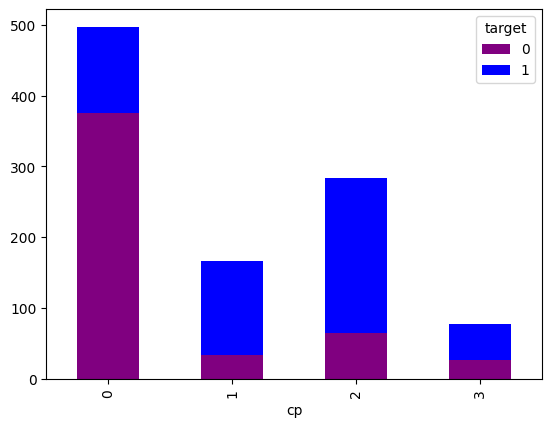

In [43]:
chest_pain.plot(kind='bar', stacked=True, color=['purple','blue'], grid=False)

# **Preparing the data for Model**

### **Scaling the data**

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [45]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0


In [46]:
X= df.drop(['target'], axis=1)
y= df['target']

In [47]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=60)


## **Check the sample Size**

In [48]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 9321
X_test- 4004
y_train- 717
y_test- 308


In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## **Decision Tree**

In [51]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    345.0  372.0       1.0      717.0         717.0
_______________________________________________
Confusion Matrix: 
 [[345   0]
 [  0 372]]

Test Result:
Accuracy Score: 98.05%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.962500    1.000000  0.980519    0.981250      0.981250
recall       1.000000    0.961039  0.980519    0.980519      0.980519
f1-score     0.980892    0.980132  0.980519    0.980512      0.980512
support    154.000000  154.000000  0.980519  308.000000    308.000000
_______________________________________________

In [52]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Decision Tree Clasifier", test_score]], 
                          columns=['Model','Testing Accuracy %'])
results_df

,Model,Testing Accuracy %
0,Decision Tree Clasifier,98.051948


## **K-NEAREST NEIGHBORING**

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 93.86%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.926346    0.950549  0.938633    0.938448      0.938903
recall       0.947826    0.930108  0.938633    0.938967      0.938633
f1-score     0.936963    0.940217  0.938633    0.938590      0.938651
support    345.000000  372.000000  0.938633  717.000000    717.000000
_______________________________________________
Confusion Matrix: 
 [[327  18]
 [ 26 346]]

Test Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.852564    0.861842  0.857143    0.857203      0.857203
recall       0.863636    0.850649  0.857143    0.857143      0.857143
f1-score     0.858065    0.856209  0.857143    0.857137      0.857137
support    154.000000  154.000000  0.857143  308.000000    308.

In [54]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", test_score]], 
                          columns=['Model','Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\YK\AppData\Local\Temp\ipykernel_12644\626166888.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Testing Accuracy %
0,Decision Tree Clasifier,98.051948
1,K-nearest neighbors,85.714286


## **RANDOM FOREST SEARCH**

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    345.0  372.0       1.0      717.0         717.0
_______________________________________________
Confusion Matrix: 
 [[345   0]
 [  0 372]]

Test Result:
Accuracy Score: 99.03%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.980892    1.000000   0.99026    0.990446      0.990446
recall       1.000000    0.980519   0.99026    0.990260      0.990260
f1-score     0.990354    0.990164   0.99026    0.990259      0.990259
support    154.000000  154.000000   0.99026  308.000000    308.000000
_______________________________________________

In [56]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", test_score]], 
                          columns=['Model','Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\YK\AppData\Local\Temp\ipykernel_12644\1806589155.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Testing Accuracy %
0,Decision Tree Clasifier,98.051948
1,K-nearest neighbors,85.714286
2,Random Forest Classifier,99.025974


In [57]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df = pd.read_csv("D:/Py/heart_disease_prediction/heart1.csv")
X = df.iloc[:,0:20]  #independent columns
y = df.iloc[:,-1]    #target column
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(1,'Score'))

     Specs       Score
7  thalach  650.008493


<font color = 'PURPLE'> <font size = 5><b>THIS IMPLIES THAT THE THALACH IS THE ATTRIBUTE THAT HELPS TO DETERMINE THE TARGET MORE THAN OTHER ATTRIBUTES</font></b>

[0.01361206 0.02305379 0.05730304 0.01013797 0.00894627 0.00521287
 0.00626144 0.02369049 0.05040546 0.02218026 0.03252493 0.04465706
 0.03861221 0.66340216]


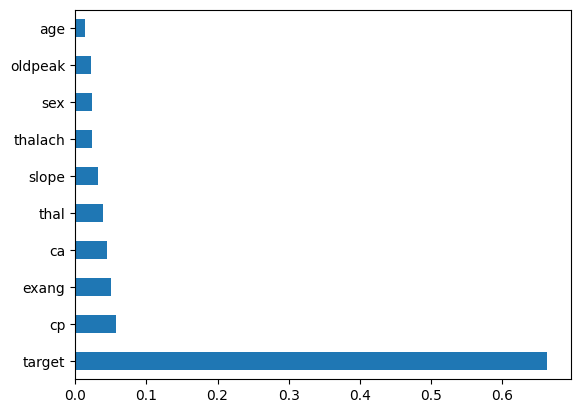

In [58]:
import pandas as pd
import numpy as np
df = pd.read_csv("D:/Py/heart_disease_prediction/heart1.csv")
X = df.iloc[:,0:20]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

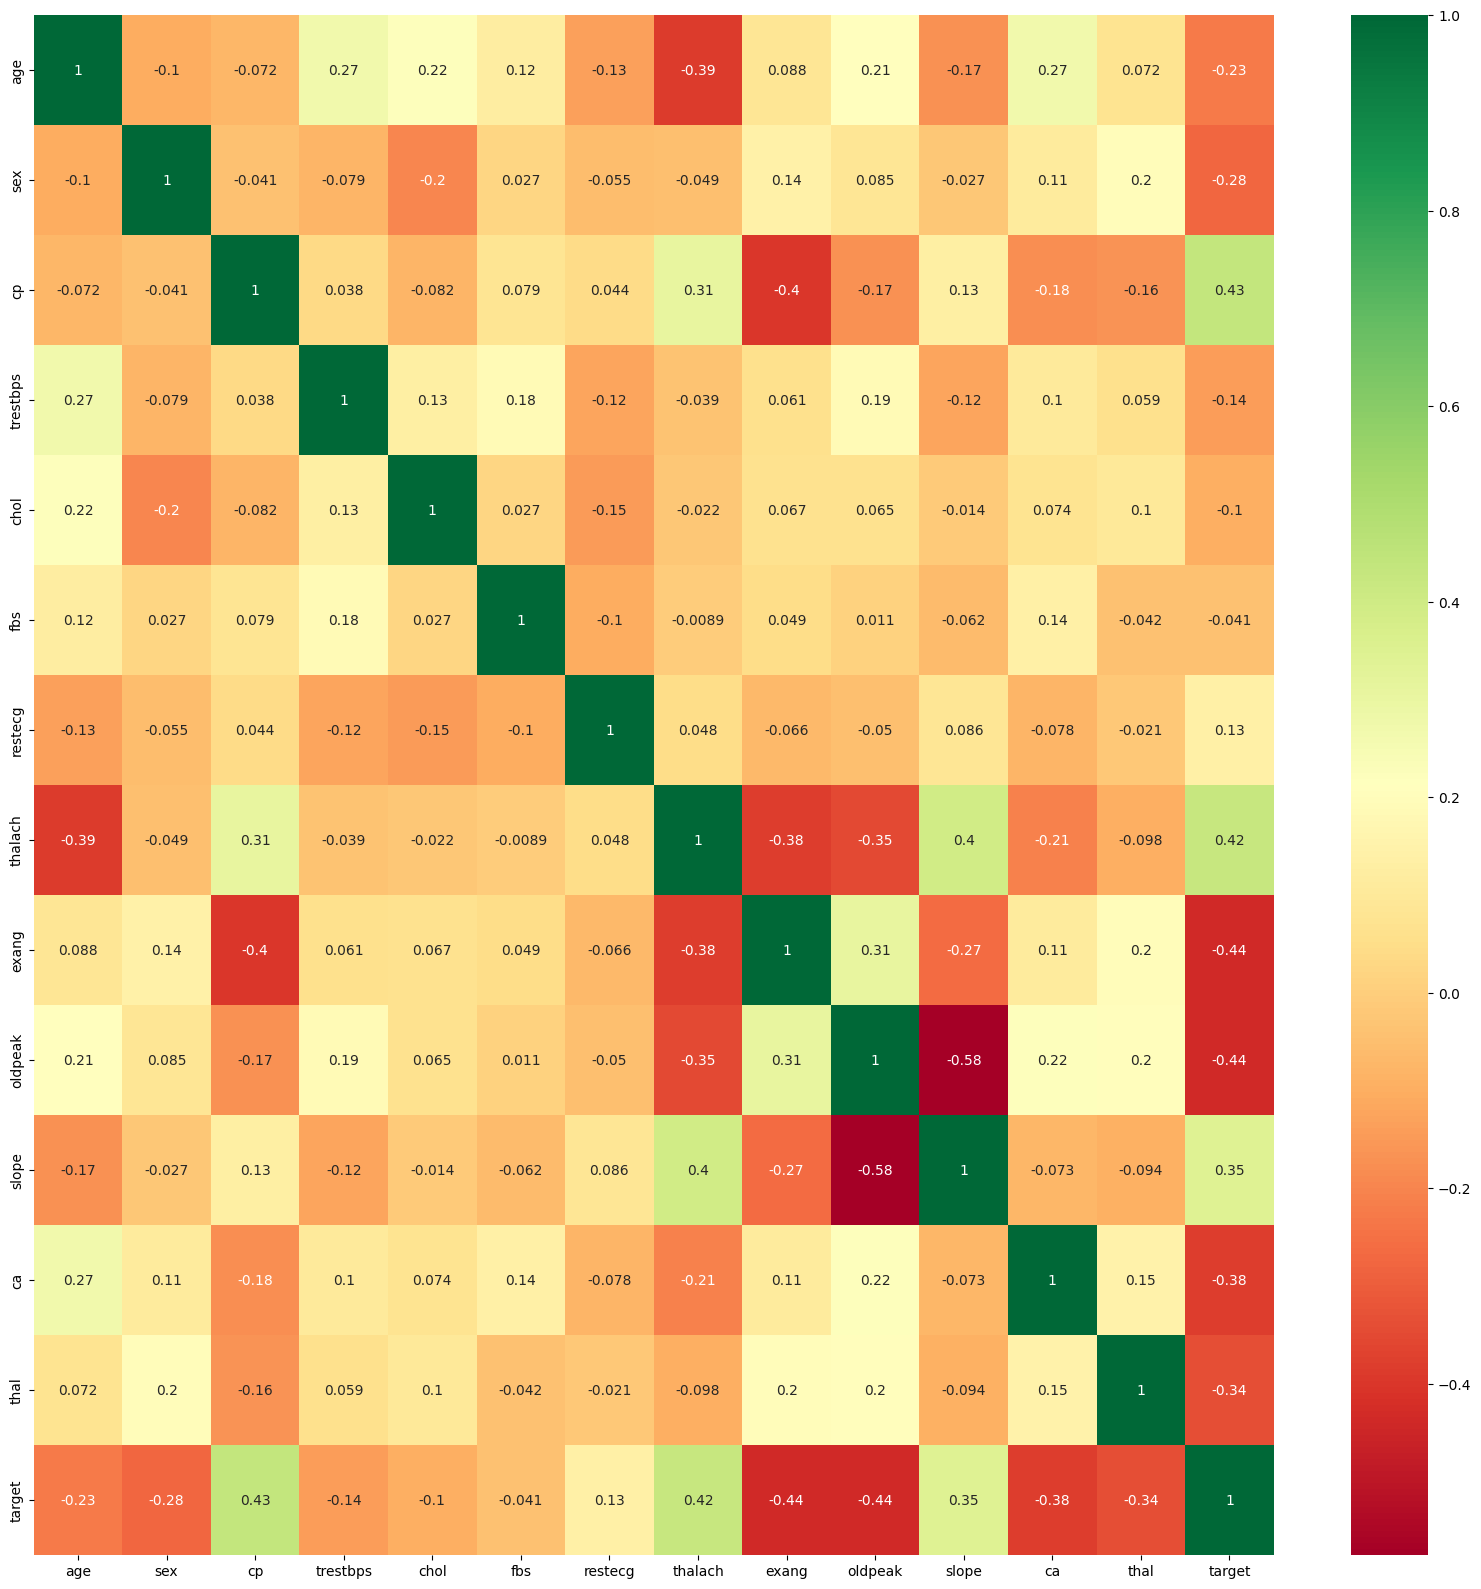

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("D:/Py/heart_disease_prediction/heart1.csv")
X = df.iloc[:,0:20]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<font color = 'PURPLE'> <font size = 5><b>EVALUATION THE MODEL</font></b>

DTC

In [60]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model1=dtc.fit(X_train,y_train)
prediction1=model1.predict(X_test)
cm1= confusion_matrix(y_test,prediction1)

In [61]:
cm1

array([[154,   0],
       [  6, 148]], dtype=int64)

In [62]:
accuracy_score(y_test,prediction1)

0.9805194805194806

In [63]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction1))
print('MSE:', metrics.mean_squared_error(y_test, prediction1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction1)))

MAE: 0.01948051948051948
MSE: 0.01948051948051948
RMSE: 0.13957263155977062


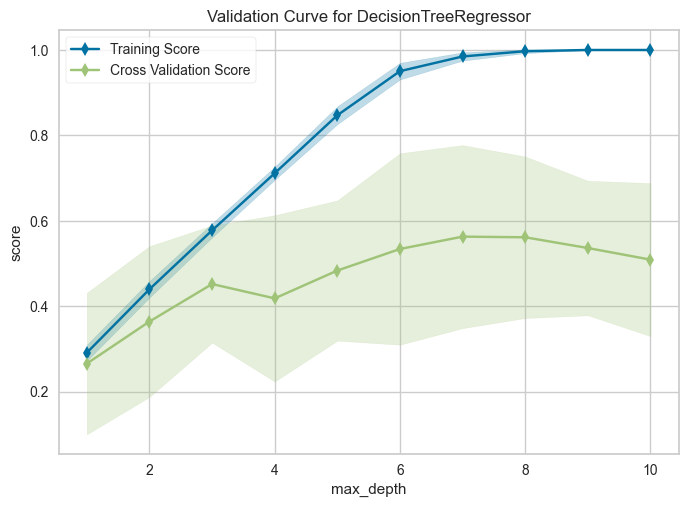

<Axes: title={'center': 'Validation Curve for DecisionTreeRegressor'}, xlabel='max_depth', ylabel='score'>

In [64]:
from yellowbrick.model_selection import ValidationCurve
from sklearn.tree import DecisionTreeRegressor
#drawing the validation curve
val_curv = ValidationCurve(
    DecisionTreeRegressor(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)

# Fit and show the visualizer
val_curv.fit(X_test,y_test)
val_curv.show()

KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
model2 = KNN.fit(X_train, y_train)
prediction2 = model2.predict(X_test)
cm2= confusion_matrix(y_test, prediction2)
cm2

array([[133,  21],
       [ 23, 131]], dtype=int64)

In [66]:
accuracy_score(y_test, prediction2)

0.8571428571428571

In [67]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction2))
print('MSE:', metrics.mean_squared_error(y_test, prediction2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction2)))

MAE: 0.14285714285714285
MSE: 0.14285714285714285
RMSE: 0.3779644730092272


KNN: 0.850822 (0.037090)
DTC: 0.970696 (0.019157)
RFS: 0.976330 (0.019690)


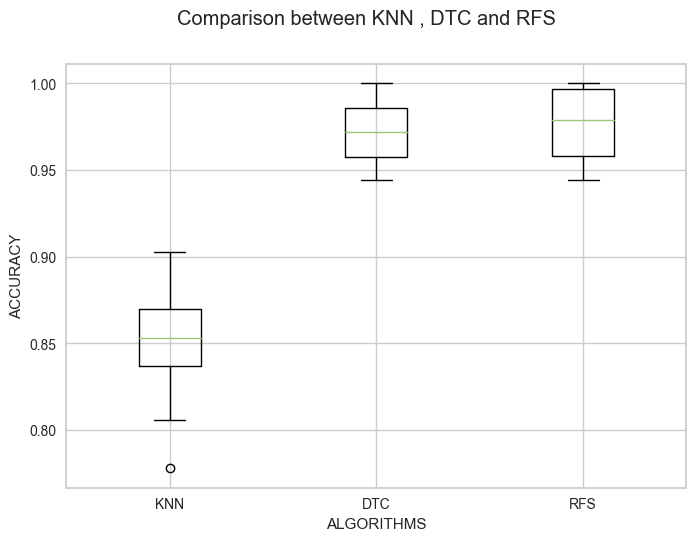

In [68]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold 
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFS',RandomForestClassifier()))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between KNN , DTC and RFS')
ax = fig.add_subplot(111)
plt.boxplot(results)

plt.xlabel("ALGORITHMS")
plt.ylabel("ACCURACY")
ax.set_xticklabels(names)
plt.show()


In [71]:
import joblib 

joblib.dump(model2, 'D:/Py/heart_disease_prediction/model.pkl')
model3 = joblib.load('D:/Py/heart_disease_prediction/model.pkl')

print(X_test[0:5])

p = model3.predict(np.array((1,1,1,1,1,1,1,1,1,1,1,1,1)).reshape(1,-1))
print("streamlit predictions",p[0])


p = model3.predict(np.array((1,1,1,1,1,1,1,1,1,1,1,1,1)).reshape(1,-1))
print("streamlit predictions",p[0])

          age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
810 -1.591791    1   0 -1.234378 -1.531978    0        0 -1.527067      1   
443  0.282961    1   2  1.050269 -1.512585    0        1  1.082252      0   
380  0.393241    1   0  0.821804 -0.542979    0        1 -1.918465      0   
807 -1.150673    1   2 -0.092055 -0.252098    0        1  1.299696      1   
745 -0.378716    1   2 -1.805540 -0.465411    0        1 -0.265896      1   

      oldpeak  slope  ca  thal  
810  0.790552      1   0     3  
443  0.449976      2   0     2  
380  0.790552      1   1     3  
807 -0.571753      2   0     2  
745  0.109400      1   0     2  
streamlit predictions 0
streamlit predictions 0


c:\Users\YK\anaconda3\envs\pyt\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\YK\anaconda3\envs\pyt\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
